<a href="https://colab.research.google.com/github/karinemaciel/Data-Analytics-Bootcamp-/blob/main/Statistics_and_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics and probability

*Considering the database populacao_brasileira.json, answer the questions below (the data is fictitious).*

You are a researcher developing an analysis on the characteristics of the workforce in Brazilian states. Answer the questions below:
* 1. Considering people fluent in English, what is the complementary probability? In other words, what is the probability of choosing a random person and them not being fluent in English? Consider fluent those who have an advanced level.
* 2. If a randomly chosen person is from Alagoas or Pará, what is the probability that they have an income greater than 5 thousand reais?
* 3. Find out the probability of a person having completed higher education in the state of Amazonas. What is the probability that the fifth person you talk to, who is from Amazonas, has completed higher education?
* 4. Considering the income of people in our dataset, can we say that the income of a Brazilian person is mostly in which range (make a range of 1,500 reais)? What is its probability density function?
* 5. Calculate the mean and variance of the sample income. Then make the normal distribution, including the graph.
* 6. First, consider the probability found in our dataset of people with postgraduate education. Considering a sample of the Brazilian population with 1 million inhabitants, what is the probability of finding 243 thousand people with postgraduate education?
* 7. Summing the densities gives us the cumulative density function. Considering the column 'Education', create the discrete cumulative density function for each level of education.
* 8. What is the margin of error for the sample proportion considering the proportion of people with intermediate English proficiency?
* 9. Calculate the income of the population. What is the probability of finding 60 people with an income one thousand reais higher than the mean?
* 10. What is the probability of choosing someone from the Southeast who is male, with elementary education, and with an income greater than 2 thousand reais per month?

##Dataset and exploratory analysis

In [7]:
### Data Manipulation in Python
import pandas as pd
import numpy as np
from pandas import Series

### Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

### Hypothesis Testing Statistics
from scipy import stats
from scipy.stats import binom

In [8]:
df = pd.read_csv('populacao_brasileira.csv.csv')
df.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [9]:
# Removing the first column
df = df.drop(columns=['Unnamed: 0'])
df.head(5)

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M


In [10]:
df.dtypes

estado                              object
idade                                int64
escolaridade                        object
nível de proficiência em inglês     object
renda                              float64
sexo                                object
dtype: object

In [11]:
df.describe()

,idade,renda
count,1000.000000,1000.000000
mean,40.986000,3082.537180
std,13.497852,996.572239
min,18.000000,103.740000
25%,29.000000,2425.815000
50%,42.000000,3076.415000
75%,52.000000,3714.487500
max,64.000000,5632.380000


## Exercise 1

In [20]:
total_rows = len(df) #valor total de dados
count_avancado = df['nível de proficiência em inglês'].value_counts()['Avançado'] #soma dos dados em nível avançado
adv_probability = count_avancado / total_rows #probabilidade de escolher uma pessoa em nível avançado.
print(f'The probability of randomly selecting a person and them being fluent in English is: {adv_probability* 100:.1f}%')
probabilidade_complementar = 1 - adv_probability # A probabilidade complementar é 1 - probabilidade de escolher uma pessoa fluente em inglês.
print(f'The probability of randomly selecting a person and them not being fluent in English is: {probabilidade_complementar*100:.1f}%')

The probability of randomly selecting a person and them being fluent in English is: 34.4%
The probability of randomly selecting a person and them not being fluent in English is: 65.6%


In [27]:
#alternative
# count_avancado = df[df['nível de proficiência em inglês'] == 'Avançado'].shape[0]


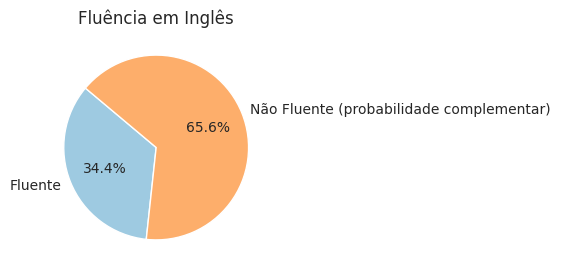

In [ ]:
#visualização em gráfico
labels = ['Fluente', 'Não Fluente (probabilidade complementar)']
sizes = [adv_probability, probabilidade_complementar]
colors = ['#9ecae1', '#fdae6b']
plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Fluência em Inglês')
plt.show()



## Exercise 2

In [33]:
#valor total de pessoas de Alagoas e do Pará
filtro_al_pa = df[(df['estado'] == 'AL') | (df['estado'] == 'PA')]
contagem_al_pa = len(filtro_al_pa)
#valor total de pessoas de com renda > 5k do Alagoas e Pará
filtro_renda = df[(df['estado'] == 'AL') & (df['renda'] > 5000)]
filtro_renda2 = df[(df['estado'] == 'PA') & (df['renda'] > 5000)]
contagem_renda = len(filtro_renda) + len(filtro_renda2)
#calculo da probabilidade dividindo o número de pessoas que possuem renda maior que 5k pelo numero de pessoas do estado de AL+PA
probabilidade = contagem_renda / contagem_al_pa
print(f'The probability of the chosen person having an income greater than 5 thousand reais is: {probabilidade*100:.1f}%')

The probability of the chosen person having an income greater than 5 thousand reais is: 5.1%


## Exercise  3

In [38]:
#filtrar pessoas do estado do amazonas com escolaridade superior completo
filtro_am = df[(df['estado'] == 'AM') & (df['escolaridade'].isin(['Superior', 'Pós-graduação']))]
contagem_am = len(filtro_am)
am_superior = contagem_am / len(df[df['estado'] == 'AM'])

print(f'The probability of a person having higher education in the state of Amazonas is: {am_superior*100:.1f}%')

#a propabilidade será calculada multiplicando a probabilidade de cada evento ser negativo até a quinta tentativa.
probabilidade_com_ens_sup = am_superior
probabilidade_sem_ens_sup = 1 - (probabilidade_com_ens_sup)
probabilidade_condicional = (probabilidade_sem_ens_sup**4)* probabilidade_com_ens_sup

print(f'The probability of the fifth person from Amazonas whom you talk to having completed higher education is: {probabilidade_condicional*100:.1f}%')

The probability of a person having higher education in the state of Amazonas is: 55.3%
The probability of the fifth person from Amazonas whom you talk to having completed higher education is: 2.2%



## Exercise  4


In [49]:
# Calcular as faixas de renda
intervalo = 1500
intervalos_renda = np.arange(0, int(df['renda'].max()) + intervalo, intervalo)

# Calcular a proporção de pessoas em cada faixa de renda
proporcoes = df['renda'].value_counts(bins=intervalos_renda, normalize=True).sort_index()

print("Probability Density Function (PDF) of Income")
print(proporcoes)


Probability Density Function (PDF) of Income
renda
(-0.001, 1500.0]    0.055
(1500.0, 3000.0]    0.414
(3000.0, 4500.0]    0.442
(4500.0, 6000.0]    0.089
Name: proportion, dtype: float64


Faixa de renda predominante: 3000 - 4500


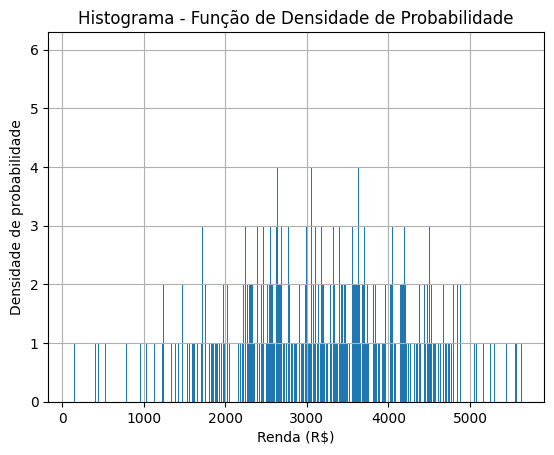

In [50]:
contagem_por_faixa, _ = np.histogram(df['renda'], bins=intervalos_renda)

faixa_predominante = np.argmax(contagem_por_faixa) * intervalo
print("Faixa de renda predominante:", faixa_predominante, "-", faixa_predominante + intervalo)

plt.hist(df['renda'], bins=intervalo )
plt.title('Histograma - Função de Densidade de Probabilidade')
plt.xlabel('Renda (R$)')
plt.ylabel('Densidade de probabilidade')
plt.grid(True)
plt.show()



## Exercise  5


Average income of the sample: 3082.5371800000003
Variance of the income sample: 993156.2281676152
Resumo Estatístico da Renda da Amostra:
count    1000.000000
mean     3082.537180
std       996.572239
min       103.740000
25%      2425.815000
50%      3076.415000
75%      3714.487500
max      5632.380000
Name: renda, dtype: float64


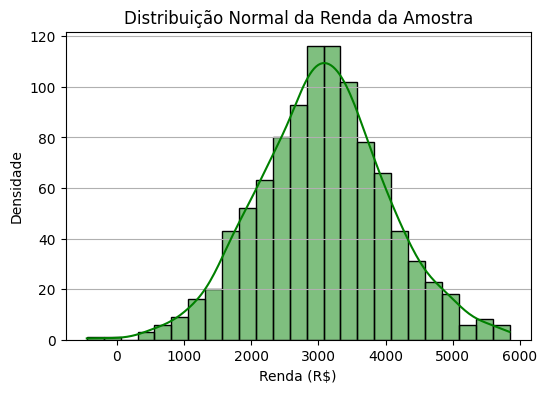

In [51]:
#calculando a media e variancia individualmente
media_renda = df['renda'].mean()
variancia_renda = df['renda'].var()

print("Average income of the sample:", media_renda)
print("Variance of the income sample:", variancia_renda)

#calculando a média e variancia através do resumo da função describe
resumo_estatistico = df['renda'].describe()

print("Resumo Estatístico da Renda da Amostra:")
print(resumo_estatistico)

#distribuição normal
amostra_normal = np.random.normal(media_renda, np.sqrt(variancia_renda), size=1000)

plt.figure(figsize=(6, 4))
sns.histplot(amostra_normal, color='green', kde=True)
plt.title('Distribuição Normal da Renda da Amostra')
plt.xlabel('Renda (R$)')
plt.ylabel('Densidade')
plt.grid(axis='y')
plt.show()

## Exercise  6



In [52]:
# amostra será o conjunto total da população, dentro do arquivo populacao_brasileira, PPT (POPULAÇÃO TOTAL)
# filtrar por pessoas dentro da nossa amostra que tenham pós graduação, PPT_POS_GRADUCA
# probabilidade de selecionar uma pessoa com pós gradução é PROBABILIDADE_GRAD = PPT_GRADUCA / PPT
ppt = len(df) #valor total de dados
ppt_pos_grad =  df['escolaridade'].value_counts()['Pós-graduação']
probabilidade_pos_grad = ppt_pos_grad / ppt
print(f'The probability found in our dataset of people with postgraduate education is: {probabilidade_pos_grad}')

# novo tamanho da amostra (aumentando a mesma) = n = 1 milhao
# sucesso = 243 mil pessoas com pós graduação
# fazer a analise da probabilidade Sucesso / fracasso
#usando a probabilidade que foi calculada para a amostra na primeira etapa = 0.253
n = 1000000  # novo tamanho da amostra
p = 0.253    # probabilidade de sucesso (ter pós-graduação)
probabilidade_nova_amostra = binom.pmf(243000, n, p)
print(f'The probability of success (243 thousand people with postgraduate education) in a new sample of 1 million people is: {probabilidade_nova_amostra}')

The probability found in our dataset of people with postgraduate education is: 0.253
The probability of success (243 thousand people with postgraduate education) in a new sample of 1 million people is: 1.1104854289794913e-119


## Exercise 7



In [ ]:
respostas_unicas = df['escolaridade'].unique()
respostas_unicas

array(['Fundamental', 'Superior', 'Médio', 'Pós-graduação'], dtype=object)

Discrete Cumulative Density Function: escolaridade
Fundamental      0.266
Médio            0.504
Pós-graduação    0.757
Superior         1.000
Name: count, dtype: float64


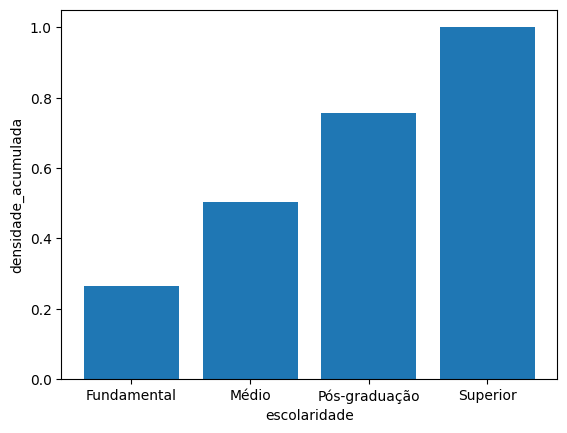

In [60]:
cont_escolaridade = df['escolaridade'].value_counts().sort_index()
frequencia_relativa = cont_escolaridade / len(df)
densidade_acumulada = frequencia_relativa.cumsum()
print(f'Discrete Cumulative Density Function: {densidade_acumulada}')

plt.bar(densidade_acumulada.index, densidade_acumulada)
plt.xlabel('escolaridade')
plt.ylabel('densidade_acumulada')
plt.show()



## Exercise  8


In [63]:
from scipy.stats import norm

int_eng_people =  df['nível de proficiência em inglês'].value_counts()['Intermediário']
ppt = len(df)
int_probability = int_eng_people / ppt
complement_p = 1 - int_probability

z = norm.ppf((1 + 0.95) / 2) #considerando uma confiança de 0.95

error_m = z * np.sqrt((complement_p * (1 - complement_p)) / ppt)
print(f'The margin of error of the sample is equal to: {error_m:.4f}')



The margin of error of the sample is equal to: 0.0291


## Exercise 9



In [66]:
#calcular a média da renda da população
#probabilidade da amostra em encontrar uma pessoa com renda >1000 reais + renda média da população
#probabilidade de encontrar 60 pessoas usando a probabilidade acima
#distribuição binomial
# ppt = len(df)
# media_renda = df['renda'].mean()
# media_alvo = media_renda + 1000

# probabilidade_1 = (df['renda'] > media_alvo).sum() / ppt
# probabilidade_60 = probabilidade_1 ** 60

desvio_renda = df['renda'].std()
valor_referencia = media_renda + 1000

probabilidade_superior = 1 - stats.norm.cdf(valor_referencia, loc=media_renda, scale=desvio_renda)

k = 60 #número de pessoas com uam renda superior ao valor de referência

probabilidade_60_pessoas = stats.binom.pmf(k, ppt, probabilidade_superior)

print(f'The probability of finding 60 people with an income one thousand reais higher than the average is.: {probabilidade_60_pessoas}')


The probability of finding 60 people with an income one thousand reais higher than the average is.: 1.159703840678535e-21


## Exercise 10

In [67]:
ppt = len(df)
# probabilidade de escolher alguem do sudeste (SP, RJ, MG, ES)
probabilidade_sud = (df['estado']).isin(['SP', 'RJ', 'MG', 'ES']).sum() / ppt
# probabilidade de escolher sexo M
probabilidade_sexo = (df['sexo'] == 'M').sum() / ppt
#probabilidade de escolher alguem na categoria Fundamental
probabilidade_esc = (df['escolaridade'] == 'Fundamental').sum() / ppt
#probabilidade de escolher alguem com renda maior que 2000/mês
probabilidade_renda = (df['renda'] > 2000).sum() / ppt
#multiplicando todas as probabilidades
probabilidade_final = probabilidade_sud * probabilidade_sexo * probabilidade_esc * probabilidade_renda
print(f'The probability of choosing someone from Sudeste which is male, with elementary education, and with an income greater than 2 thousand reais per month is: {probabilidade_final:.4f}')

The probability of choosing someone from Sudeste which is male, with elementary education, and with an income greater than 2 thousand reais per month is: 0.0174
